# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Investigate dataset
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## #1 

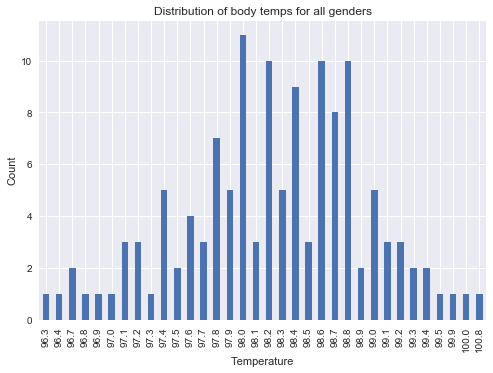

In [3]:
df.groupby('temperature').size().plot(kind='bar')
plt.title('Distribution of body temps for all genders')
plt.ylabel('Count')
plt.xlabel('Temperature')
None

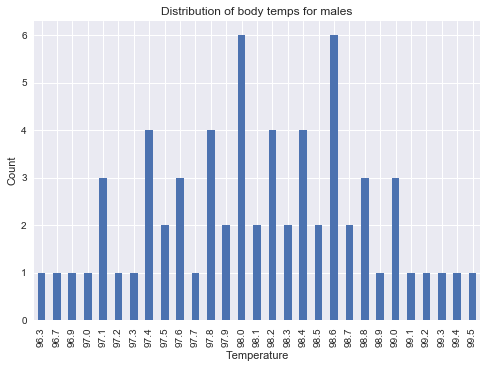

In [4]:
df[df.gender=='M'].groupby('temperature').size().plot(kind='bar')
plt.title('Distribution of body temps for males')
plt.ylabel('Count')
plt.xlabel('Temperature')
None

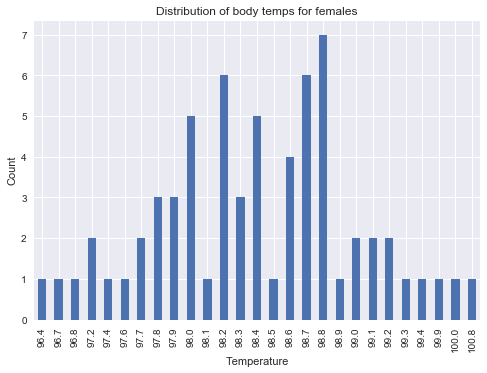

In [5]:
df[df.gender=='F'].groupby('temperature').size().plot(kind='bar')
plt.title('Distribution of body temps for females')
plt.ylabel('Count')
plt.xlabel('Temperature')
None

In [6]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The distribution of body temperatures is normally distributed as p > 5% and also visually confirmed through histograms.

## #2

In [7]:
df.temperature.count()

130

* The sample size is large as n = 130 > 30  


* The observations are independent as each observation represents a separate human being

## #3

H<sub>0</sub>: the mean temperature is 98.6&deg; F  
H<sub>1</sub>: the mean temperature is **not** 98.6&deg; F

In [8]:
# See how many males and females are in the dataset
print('# of males in sample: %i' % (df[df.gender=='M'].gender.count()))
print('# of females in sample: %i' % (df[df.gender=='F'].gender.count()))

# of males in sample: 65
# of females in sample: 65


In [9]:
# Means of dataset
print('Mean temp: %f' % (df.temperature.mean()))
print('Mean temp of males: %f' % (df[df.gender=='M'].temperature.mean()))
print('Mean temp of females: %f' % (df[df.gender=='F'].temperature.mean()))

Mean temp: 98.249231
Mean temp of males: 98.104615
Mean temp of females: 98.393846


In [10]:
def RunModel(df):
    # Resample via bootstrap. Preserves equal gender ratio
    # Input a dataframe with n observations and return a numpy array with n randomly selected observations with replacement 
    data_males = np.random.choice(df[df.gender=='M'].temperature, len(df.temperature)/2, replace=True)
    data_females = np.random.choice(df[df.gender=='F'].temperature, len(df.temperature)/2, replace=True)
    data = np.append(data_males, data_females)
    return data

def TestStat(data):
    # Returns the test stat which in this case is the mean
    return data.mean()

In [11]:
# Simulate 1000 experiments
# test_stats contains 1000 simulated sample means using bootstrapping as the resampling methodology
test_stats = pd.DataFrame([TestStat(RunModel(df)) for i in range(1000)])
test_stats.columns = ['temperature']

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Mean of 1000 simulated sample means: 98.245310
95% confidence interval: [98.117354, 98.373266]


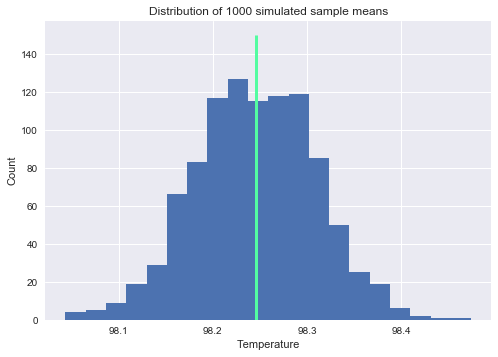

In [12]:
test_stats_mean = test_stats.temperature.mean()
test_stats_std = test_stats.temperature.std()

plt.vlines(test_stats_mean, 0, 150, linewidth=3, color=sns.xkcd_rgb['sea green'])
plt.hist(test_stats.temperature, bins=20)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of 1000 simulated sample means')
None

print('Mean of 1000 simulated sample means: %f' % (test_stats_mean))
print('95%% confidence interval: [%f, %f]' % (test_stats_mean - 2 * test_stats_std, test_stats_mean + 2 * test_stats_std))

In [13]:
z_score = (98.6 - test_stats_mean) / test_stats_std
print('z score: %f' % (z_score))
print('p value < 0.001')

z score: 5.543916
p value < 0.001


* The probability of seeing a result as extreme as 98.6&deg; is < 0.001. Thus, we reject the null and conclude that the mean human temperature is not 98.6&deg;. Instead, our 95% confidence interval is [98.13&deg;, 98.38&deg;].


* I used a 1 sample test because our goal is to find the true mean of the human population, regardless of gender. Furthermore, there are an equal number of males and females in the data set. I have preserved this ratio during the resampling process.


* In this situation, we use a z statistic because the sample size is large (n > 30).


* If we use a T test, the probability of seeing 98.6&deg; is still < 0.001.

## #4

In [14]:
print('Mean of 1000 simulated sample means: %f' % (test_stats_mean))
print('95%% confidence interval: [%f, %f]' % (test_stats_mean - 2 * test_stats_std, test_stats_mean + 2 * test_stats_std))

Mean of 1000 simulated sample means: 98.245310
95% confidence interval: [98.117354, 98.373266]


When a person's temperature is below 98.13&deg; F or above 98.38&deg; F, we would consider their temperature abnormal as it falls outside our 95% confidence interval, i.e. this individual's temperature is more extreme than 95% of the population.

## #5

H<sub>0</sub>: there is no difference in mean temp between males and females, i.e. diff in means = 0  
H<sub>1</sub>: there is a difference in mean temp between males and females

Assumed significance level: 5%

In [19]:
def RunModel2(df):
    # Resample via bootstrap
    # Randomly selects samples from both male and female observations as we are assuming no diff between the 2 populations
    # Input a dataframe with n observations and return 2 numpy arrays 
    data_males = np.random.choice(df.temperature, len(df.temperature)/2, replace=True)
    data_females = np.random.choice(df.temperature, len(df.temperature)/2, replace=True)
    return data_males, data_females

def TestStat2(data):
    # Returns the test stat which in this case is the difference in means
    data1, data2 = data
    return abs(data1.mean()-data2.mean())

In [20]:
# Simulate 1000 experiments
# test_stats2 contains 1000 simulated diff in sample means between males and femals using bootstrapping
test_stats2 = pd.DataFrame([TestStat2(RunModel2(df)) for i in range(1000)])
test_stats2.columns = ['temperature']

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Diff in means of male and female temps: 0.289231
95% confidence interval: [0.132669, 0.445792]


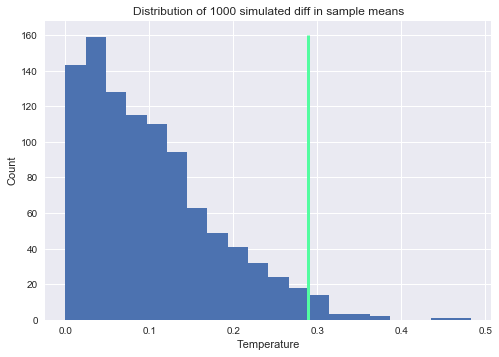

In [27]:
test_stats2_mean = abs(df[df.gender=='M'].temperature.mean() - df[df.gender=='F'].temperature.mean())
test_stats2_std = test_stats2.temperature.std()

plt.vlines(test_stats2_mean, 0, 160, linewidth=3, color=sns.xkcd_rgb['sea green'])
plt.hist(test_stats2.temperature, bins=20)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of 1000 simulated diff in sample means')
None

print('Diff in means of male and female temps: %f' % (test_stats2_mean))
print('95%% confidence interval: [%f, %f]' % (test_stats2_mean - 2 * test_stats2_std, test_stats2_mean + 2 * test_stats2_std))

In [29]:
z_score2 = (test_stats2_mean - 0) / test_stats2_std

print('z score: %f' % (z_score2))
print('p value < 0.001')

z score: 3.694784
p value < 0.001


Under the null, the probability of seeing a difference in mean temps between males and females as extreme as 0.29&deg; F is less than 0.001.

Thus, we reject the null and conclude that there is likely a difference in mean temps between males and females. Our 95% confidence interval is above.